# Tratando dados?

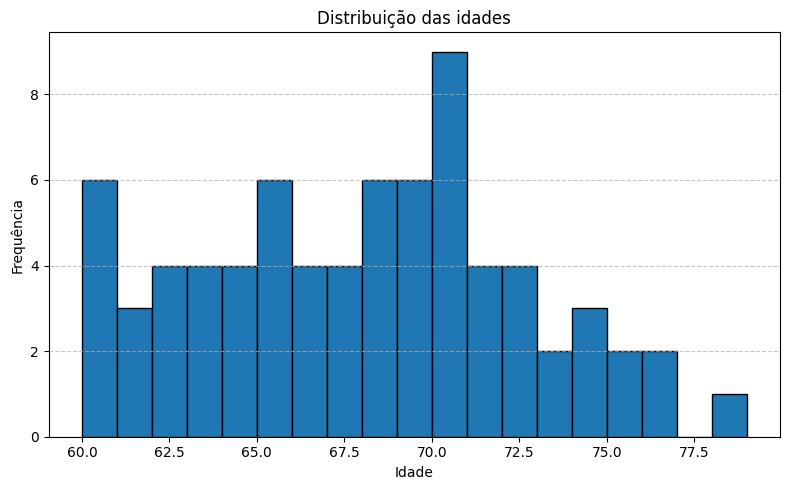

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# Importa o arquivo CSV
df = pd.read_csv('velhos.csv')

# Plota a distribuição das idades
plt.figure(figsize=(8, 5))
df['Qual a sua idade?'].plot(kind='hist', bins=range(df['Qual a sua idade?'].min(), df['Qual a sua idade?'].max() + 2), edgecolor='black')
plt.title('Distribuição das idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
idade_mais_comum = df['Qual a sua idade?'].mode()[0]
idade_media = df['Qual a sua idade?'].mean()
idade_mediana = df['Qual a sua idade?'].median()
ocorrencias_mais_comum = df['Qual a sua idade?'].value_counts()[idade_mais_comum]

print(f"Idade mais comum: {idade_mais_comum} ({1+ocorrencias_mais_comum} ocorrências)")
print(f"Idade média: {idade_media:.2f}")
print(f"Idade mediana: {idade_mediana}")


Idade mais comum: 70 (10 ocorrências)
Idade média: 67.47
Idade mediana: 68.0


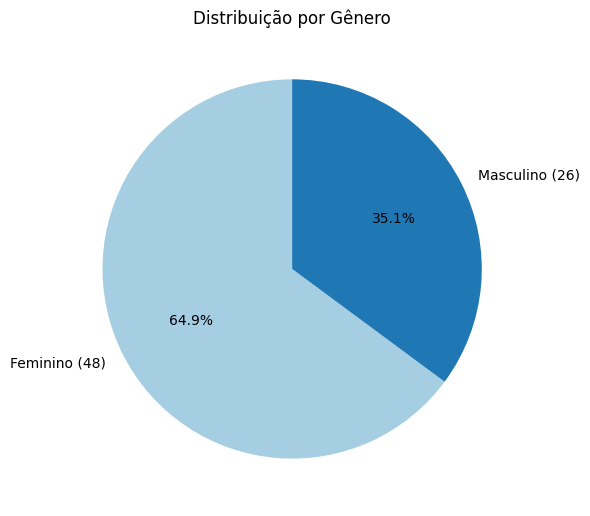

In [ ]:
genero_counts = df['Qual seu gênero?'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    genero_counts,
    labels=[f"{g} ({c})" for g, c in zip(genero_counts.index, genero_counts.values)],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Distribuição por Gênero')
plt.tight_layout()
plt.show()

In [3]:
from collections import Counter

# Verifique os nomes das colunas para encontrar possíveis diferenças
print("Colunas disponíveis no DataFrame:")
for col in df.columns:
    print(repr(col))

# Opcional: remova espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

colunas_tabelas = [
    "Quais dispositivos você utiliza no seu cotidiano? (Pode marcar mais de uma alternativa)",
    "Para quais atividades você mais usa a internet? (Pode escolher mais de uma opção)",
    "Quais redes sociais você utiliza? (Pode marcar mais de uma alternativa)",
    "Utiliza aplicativos bancários?",
    "Quais aplicativos bancários você utiliza? (Pode marcar mais de uma alternativa)",
    "Você realiza pagamentos online?",
    "Quais métodos você utiliza? (Pode marcar mais de uma alternativa)",
    "Você já ouviu falar sobre golpes e/ou crimes virtuais?",
    "Quais desses tipos você já ouviu falar? (Pode marcar mais de uma alternativa)",
    "Percepção de risco pessoal",
    "Comportamento diante de contatos desconhecidos/suspeitos",
    "Compartilhamento de informação e busca por ajuda",
    "Você já foi vítima de algum tipo de golpe ou crime virtual/pela internet/celular? (Já na sua lista - mantida por ser crucial)",
    "Qual foi o principal impacto dessa situação para você?",
    "Você faz uso ativo da internet?"
]

tabelas = {}
for coluna in colunas_tabelas:
    if coluna not in df.columns:
        print(f"Atenção: coluna não encontrada -> {coluna}")
        # Tente encontrar a coluna mais próxima
        from difflib import get_close_matches
        sugestao = get_close_matches(coluna, df.columns, n=1)
        if sugestao:
            print(f"Talvez você quis dizer: {sugestao[0]}")
        continue
    if df[coluna].dropna().apply(lambda x: ',' in str(x)).any():
        # Coluna com múltiplas respostas separadas por vírgula
        respostas = df[coluna].dropna().str.split(',').sum()
        respostas = [r.strip() for r in respostas]
        tabela = pd.DataFrame.from_dict(Counter(respostas), orient='index', columns=['Quantidade'])
        tabela = tabela.sort_values(by='Quantidade', ascending=False)
    else:
        tabela = df[coluna].value_counts(dropna=False).to_frame('Quantidade')
    tabelas[coluna] = tabela
    display(tabela)

Colunas disponíveis no DataFrame:
'Carimbo de data/hora'
'Pontuação'
'Ao responder este formulário, você está ajudando em uma pesquisa da faculdade sobre idosos e tecnologia. Suas respostas serão usadas apenas para este trabalho.'
'Qual a sua idade?'
'Qual seu gênero?'
'Qual é a sua escolaridade?'
'Qual bairro você reside?'
'Qual a renda total mensal da sua família/domicílio?'
'Grau de familiaridade com tecnologia'
'Uso da internet e atividade online'
'Quais dispositivos você utiliza no seu cotidiano? (Pode marcar mais de uma alternativa)'
'Para quais atividades você mais usa a internet? (Pode escolher mais de uma opção)'
'Quais redes sociais você utiliza? (Pode marcar mais de uma alternativa)'
'Suporte Tecnológico'
'Utiliza aplicativos bancários?'
'Quais aplicativos bancários você utiliza? (Pode marcar mais de uma alternativa)'
'Você realiza pagamentos online?'
'Quais métodos você utiliza? (Pode marcar mais de uma alternativa)'
'Você já ouviu falar sobre golpes e/ou crimes virtuais?'


,Quantidade
Celular,74
Computador/Notebook,16
Tablet,4


,Quantidade
Comunicar-se com com familiares,34
Usar redes sociais,29
Ler notícias ou se informar,26
Fazer compras online,14
Enviar/receber e-mails,9
Assistir vídeos (Youtube,6
Netflix,6
etc.),6


,Quantidade
Whatsapp,74
Facebook,35
Instagram,4


,Quantidade
Utiliza aplicativos bancários?,
Sim,60
Não,14


,Quantidade
Bradesco,18
Itaú,17
Caixa,15
Santander,13
Banco do Brasil,13
PIX,1
Nubank,1


,Quantidade
Você realiza pagamentos online?,
Sim,60
Não,14


,Quantidade
PIX,60
TED,16
Boleto,3


,Quantidade
Você já ouviu falar sobre golpes e/ou crimes virtuais?,
Sim,74


,Quantidade
Fraudes em compras online,20
Roubo de identidade,17
Golpe de cartão clonado,16
Extorsão,12
Golpe de empréstimo falso,10
ou FGTS,7
Golpe do INSS,7
Golpe do falso parente,7
Golpe do falso funcionário,7


,Quantidade
Percepção de risco pessoal,
4,30
3,22
5,16
2,6


,Quantidade
Comportamento diante de contatos desconhecidos/suspeitos,
Ignoro/Bloqueio o contato,43
Peço ajuda a alguém de confiança,23
Não sei o que fazer,4
Tento verificar se a informação é verdadeira (ligando por um...),3
Respondo para entender do que se trata,1


,Quantidade
Compartilhamento de informação e busca por ajuda,
Sempre converso,48
Às vezes converso,15
Raramente converso,7
Nunca converso,4


,Quantidade
Você já foi vítima de algum tipo de golpe ou crime virtual/pela internet/celular? (Já na sua lista - mantida por ser crucial),
Não,49
Sim,25


,Quantidade
Qual foi o principal impacto dessa situação para você?,
NaN,49
Prejuízo financeiro,14
Estresse/Preocupação,8
Sensação de vulnerabilidade,3


,Quantidade
Você faz uso ativo da internet?,
Sim,74
